<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Tensorflow and Keras: Getting Started</h1>
  <img style="vertical-align:middle; float:right" src="http://34.125.19.140/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

c:\Users\arang\anaconda3\envs\myEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
print(tf.__version__)

## Loading MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 7s 1us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


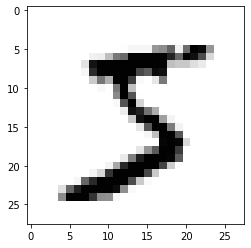

In [4]:
plt.imshow(x_train[0], cmap='Greys')

## Training with one-hot labels

In [5]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)



1875/1875 [==============================] - 6s 3ms/step - loss: 0.4686 - accuracy: 0.8772


## Training with sparse labels

In [7]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# model_lr.fit(x_train, y_train)

In [9]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

## Review Traning Results

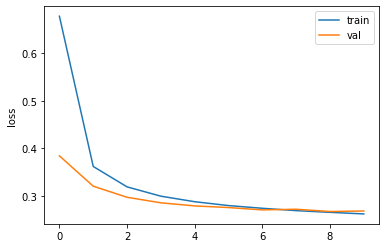

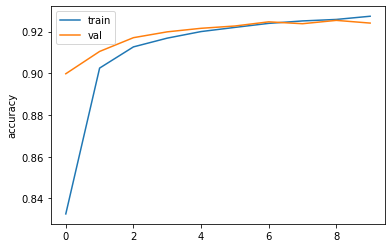

In [10]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9241


[0.267997145652771, 0.9240999817848206]

1/1 [==============================] - 0s 211ms/step
[1.45731965e-05 3.49264700e-10 4.01118377e-05 6.92383293e-03
 8.72774649e-07 3.46922170e-05 3.03796344e-09 9.92298543e-01
 3.88955632e-05 6.48427638e-04]  =>  7


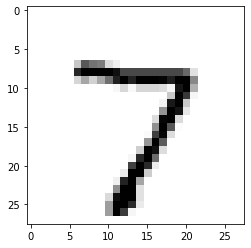

[8.8938978e-04 1.0701392e-05 9.8690701e-01 6.3243392e-04 7.4291148e-13
 3.7280552e-03 7.6985690e-03 9.2184874e-15 1.3385067e-04 2.0960721e-11]  =>  2


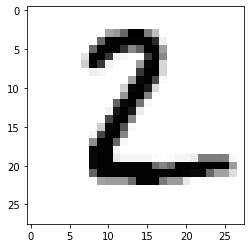

[5.8454525e-06 9.7823346e-01 1.0773336e-02 2.6098855e-03 1.6631282e-04
 7.4660132e-04 1.2933294e-03 1.7916415e-03 4.1118246e-03 2.6783213e-04]  =>  1


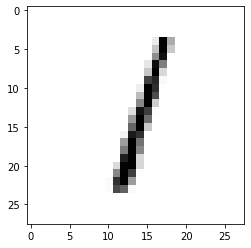

[9.9979800e-01 6.0918617e-11 4.9708953e-05 2.9473738e-06 2.3575705e-08
 3.3269895e-05 9.1283968e-05 5.5408914e-06 1.1155898e-05 8.1067892e-06]  =>  0


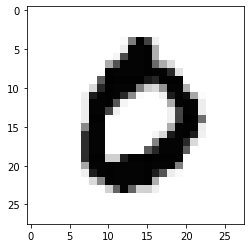

[7.3390716e-04 2.1843948e-06 3.1503902e-03 7.6321041e-05 9.5294285e-01
 1.4636885e-04 2.3711983e-03 3.3939050e-03 4.9876785e-03 3.2195240e-02]  =>  4


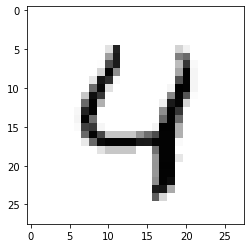

In [12]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [13]:
model_lr.predict(x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 101ms/step


array([[3.0932561e-04, 4.6656976e-05, 1.4003383e-01, 7.2838998e-01,
        5.0184707e-04, 5.8416575e-02, 1.9775171e-02, 4.7468297e-05,
        5.2466683e-02, 1.2397674e-05]], dtype=float32)

In [14]:
model_lr.predict(x_test[18:19])

1/1 [==============================] - 0s 76ms/step


array([[3.0932561e-04, 4.6656976e-05, 1.4003383e-01, 7.2838998e-01,
        5.0184707e-04, 5.8416575e-02, 1.9775171e-02, 4.7468297e-05,
        5.2466683e-02, 1.2397674e-05]], dtype=float32)

## Adding Model Complexity

In [15]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

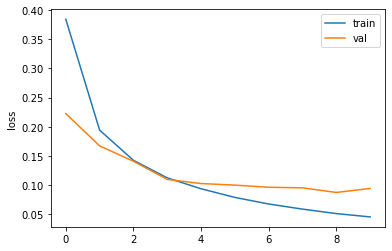

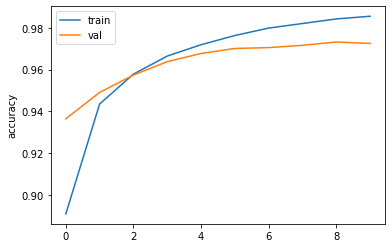

In [17]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()